In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions", "Plots", "LinearAlgebra", "Random"])

  Activating project at `~`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`


In [2]:
Pkg.instantiate()

In [3]:
using Distributions, Random, LinearAlgebra, Plots

In [4]:
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [5]:
data = rand(nd,(1000,2))

1000×2 Matrix{Float64}:
  0.419694    0.202518
  0.307441   -1.67115
  0.330724   -1.01176
  0.867835   -1.44952
 -1.99319    -1.04895
 -1.47125    -0.565209
 -1.12971     0.623413
  0.257519   -0.18831
 -0.361419   -0.963777
  0.125536    1.75599
 -0.761534   -1.01541
 -1.50743     0.320399
  2.18749     0.868882
  ⋮          
  0.0588704   0.165552
 -0.83862     1.27694
 -0.724549    0.998693
 -0.12542    -0.0347229
  0.927829    0.206694
 -0.163393   -0.00401623
 -0.795544   -0.294375
 -1.32754    -0.172243
 -0.517847   -1.79269
  0.463264    0.833696
  1.05302    -1.07994
  2.18185    -0.406819

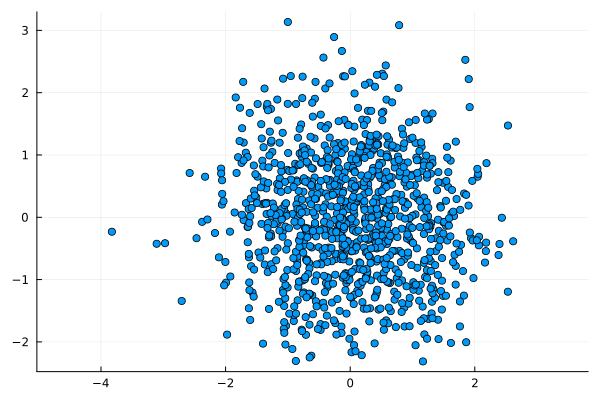

In [6]:
scatter(data[:,1],data[:,2], aspect_ratio = :equal, legend = nothing)

In [7]:
#stretching the data 
datas = copy(data)
datas[:,2] =  datas[:,2]*3

1000-element Vector{Float64}:
  0.6075538338413107
 -5.013445435095847
 -3.035284528914817
 -4.348564314538369
 -3.1468464864347028
 -1.6956265765250742
  1.8702400243965123
 -0.5649285027021664
 -2.891331119561017
  5.26795964332615
 -3.0462230904817105
  0.9611981666215066
  2.6066461658006372
  ⋮
  0.4966552522094464
  3.8308280694733785
  2.9960777705431436
 -0.10416878440057997
  0.62008188672263
 -0.012048696871498144
 -0.8831255593793387
 -0.5167303257921743
 -5.378069902236623
  2.5010888829362186
 -3.239829489120516
 -1.220457774096926

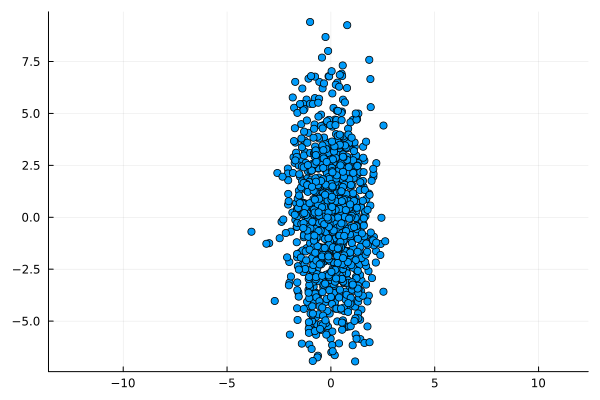

In [8]:
scatter(datas[:,1],datas[:,2], aspect_ratio = :equal, legend = nothing)

In [9]:
#rotation of data 
θ = π/4
r = [cos(θ) -sin(θ); sin(θ) cos(θ)]
datar = datas * r

1000×2 Matrix{Float64}:
  0.726374   0.132837
 -3.32765   -3.76243
 -1.91241   -2.38013
 -2.46125   -3.68855
 -3.63456   -0.815755
 -2.23932   -0.158662
  0.523631   2.12129
 -0.217371  -0.581559
 -2.30004   -1.78892
  3.81378    3.63624
 -2.69249   -1.61552
 -0.386241   1.74558
  3.38997    0.296386
  ⋮         
  0.392816   0.309561
  2.11581    3.3018
  1.60621    2.63088
 -0.162344   0.0150269
  1.09454   -0.21761
 -0.124056   0.107017
 -1.187     -0.0619296
 -1.3041     0.573331
 -4.16904   -3.4367
  2.09611    1.44096
 -1.5463    -3.03551
  0.679806  -2.40579

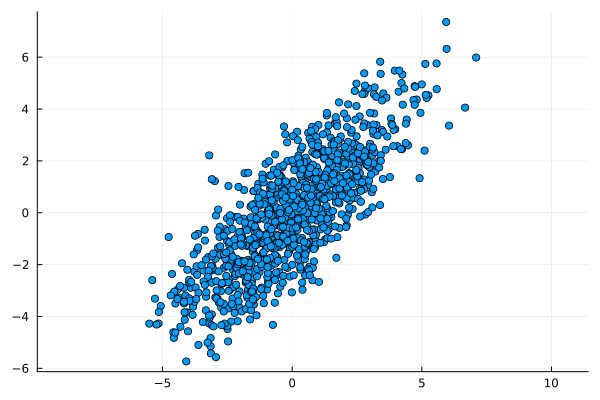

In [10]:
scatter(datar[:, 1], datar[:, 2], aspect_ratio=:equal, legend=false)

In [11]:
#translation of data 
delta_x = 1
delta_y = 1 
datat = datar .+ [delta_x delta_y]

1000×2 Matrix{Float64}:
  1.72637    1.13284
 -2.32765   -2.76243
 -0.912413  -1.38013
 -1.46125   -2.68855
 -2.63456    0.184245
 -1.23932    0.841338
  1.52363    3.12129
  0.782629   0.418441
 -1.30004   -0.788918
  4.81378    4.63624
 -1.69249   -0.615519
  0.613759   2.74558
  4.38997    1.29639
  ⋮         
  1.39282    1.30956
  3.11581    4.3018
  2.60621    3.63088
  0.837656   1.01503
  2.09454    0.78239
  0.875944   1.10702
 -0.186999   0.93807
 -0.304098   1.57333
 -3.16904   -2.4367
  3.09611    2.44096
 -0.546305  -2.03551
  1.67981   -1.40579

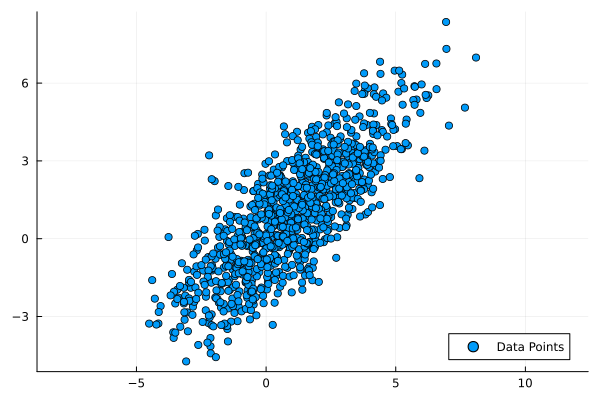

In [12]:
scatter(datat[:, 1], datat[:, 2], aspect_ratio=:equal, label="Data Points", (legend=:bottomright))

In [13]:
Xavg = mean(datat, dims=1)  #Compute mean of data
B = datat .- Xavg  #Mean-subtracted data
U, S, V = svd(B/sqrt(1000)) #PCA via SVD

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.00628239   -0.0136744
  0.0541419    -0.00674946
  0.032874     -0.00866377
  0.047102     -0.0251996
  0.0336174     0.0662911
  0.0181139     0.0486171
 -0.0201651     0.0355129
  0.00629424   -0.00775836
  0.0311901     0.0135561
 -0.0564566    -0.00693738
  0.0327771     0.0265411
 -0.0104638     0.0482197
 -0.0274328    -0.0718188
  ⋮            
 -0.00516068   -0.00198148
 -0.0411915     0.0249786
 -0.0321925     0.0217938
  0.0012642     0.0043109
 -0.00631734   -0.0300566
  0.000266111   0.00548039
  0.00950925    0.0263643
  0.00546469    0.0432926
  0.0579009     0.0200603
 -0.0266363    -0.0161927
  0.0352154    -0.0318199
  0.0137214    -0.0693849
singular values:
2-element Vector{Float64}:
 2.940161463673499
 0.9811356164833821
Vt factor:
2×2 Matrix{Float64}:
 -0.694079  -0.719898
 -0.719898   0.694079

In [14]:
theta = range(0, 2π, length=1000)  #Angle range for circle
circle_x = cos.(theta)  #x-coordinates of the unit circle
circle_y = sin.(theta)  #y-coordinates of the unit circle
circle = [circle_x circle_y]  #Combine x and y into a 2D array 

1000×2 Matrix{Float64}:
 1.0        0.0
 0.99998    0.00628943
 0.999921   0.0125786
 0.999822   0.0188673
 0.999684   0.0251552
 0.999506   0.0314422
 0.999288   0.0377279
 0.999031   0.0440121
 0.998734   0.0502946
 0.998398   0.056575
 0.998023   0.0628533
 0.997608   0.069129
 0.997153   0.0754021
 ⋮         
 0.997608  -0.069129
 0.998023  -0.0628533
 0.998398  -0.056575
 0.998734  -0.0502946
 0.999031  -0.0440121
 0.999288  -0.0377279
 0.999506  -0.0314422
 0.999684  -0.0251552
 0.999822  -0.0188673
 0.999921  -0.0125786
 0.99998   -0.00628943
 1.0       -2.44929e-16

In [15]:
Xstd = circle * Diagonal(S) * V'

1000×2 Matrix{Float64}:
 -2.04071  -2.11662
 -2.04511  -2.11229
 -2.04943  -2.10788
 -2.05367  -2.10339
 -2.05783  -2.09882
 -2.0619   -2.09416
 -2.0659   -2.08942
 -2.06981  -2.08459
 -2.07365  -2.07969
 -2.0774   -2.0747
 -2.08107  -2.06963
 -2.08465  -2.06448
 -2.08815  -2.05924
  ⋮        
 -1.987    -2.15863
 -1.99228  -2.15523
 -1.99748  -2.15175
 -2.0026   -2.14819
 -2.00764  -2.14454
 -2.0126   -2.1408
 -2.01749  -2.13698
 -2.02229  -2.13308
 -2.02702  -2.12909
 -2.03166  -2.12502
 -2.03622  -2.12086
 -2.04071  -2.11662

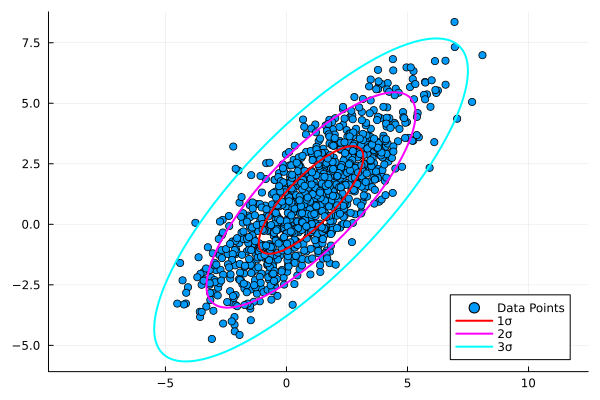

In [16]:
plot!(Xavg[1] .+ Xstd[:, 1], Xavg[2] .+ Xstd[:, 2], color=:red, lw=2, label = "1σ")
plot!(Xavg[1] .+ 2 .* Xstd[:, 1], Xavg[2] .+ 2 .* Xstd[:, 2], color=:magenta1, lw=2, label = "2σ")
plot!(Xavg[1] .+ 3 .* Xstd[:, 1], Xavg[2] .+ 3 .* Xstd[:, 2], color=:cyan, lw=2, label = "3σ")

In [17]:
#principal directions 
principal_direction_1 = V[:, 1] * S[1]
principal_direction_2 = V[:, 2] * S[2]

2-element Vector{Float64}:
 -0.7063179647749291
  0.6809860722279334

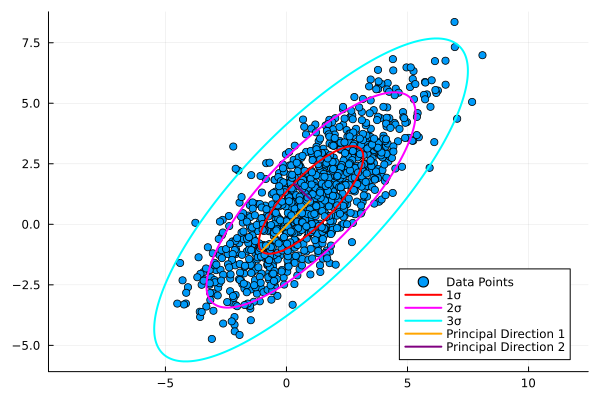

In [18]:
#plot the principal directions
plot!([Xavg[1], Xavg[1] + principal_direction_1[1]], 
      [Xavg[2], Xavg[2] + principal_direction_1[2]], 
      color=:orange, lw=2, label= "Principal Direction 1")

plot!([Xavg[1], Xavg[1] + principal_direction_2[1]], 
      [Xavg[2], Xavg[2] + principal_direction_2[2]], 
      color=:purple, lw=2, label = "Principal Direction 2")